LAB8_AIM:To implement K-Means clustering using scikit-learn library for unlabeled and
labeled data. 

Write a python program to perform K-Means clustering on Breast Cancer Data.

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [2]:
datasets=load_breast_cancer()
print(datasets.data.shape)
print(datasets.target_names)
X=datasets.data[:,0:3]

(569, 30)
['malignant' 'benign']


In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)
X_std=sc.transform(X)
kmeans = KMeans(n_clusters=2, random_state=25)
kmeans.fit(X_std)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=25, tol=0.0001, verbose=0)

In [5]:
kmeans.cluster_centers_.shape


(2, 3)

In [6]:
labels= kmeans.labels_

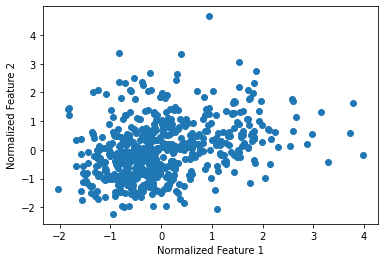

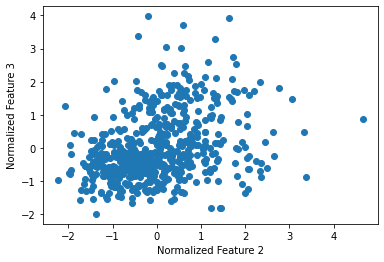

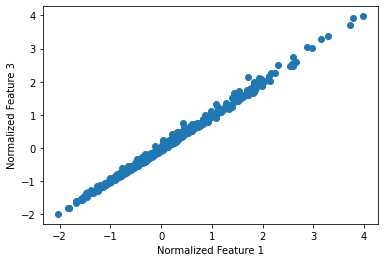

In [7]:
plt.scatter(X_std[:,0], X_std[:,1])
plt.xlabel('Normalized Feature 1')
plt.ylabel('Normalized Feature 2')
plt.show()
plt.scatter(X_std[:,1], X_std[:,2])
plt.xlabel('Normalized Feature 2')
plt.ylabel('Normalized Feature 3')
plt.show()
plt.scatter(X_std[:,0], X_std[:,2])
plt.xlabel('Normalized Feature 1')
plt.ylabel('Normalized Feature 3')
plt.show()


In [8]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X,kmeans.labels_))

0.5840428716139654


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


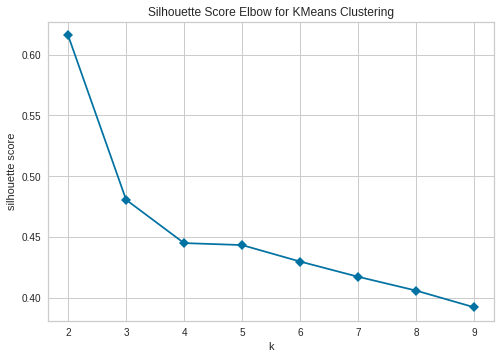

In [9]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans(random_state=25)
visualizer= KElbowVisualizer(model, k=(2,10), metric='silhouette',timings=False)
visualizer.fit(X)
visualizer.poof()

In [10]:
import numpy as np
distance_to_clostest_cluster_centre = []
for k in range(1,100):
 kmeans = KMeans(n_clusters=k) 
 kmeans.fit(X_std)
 distance = np.min(kmeans.transform(X_std),axis=1)
 average_distance = np.mean(distance)
 distance_to_clostest_cluster_centre.append(average_distance)

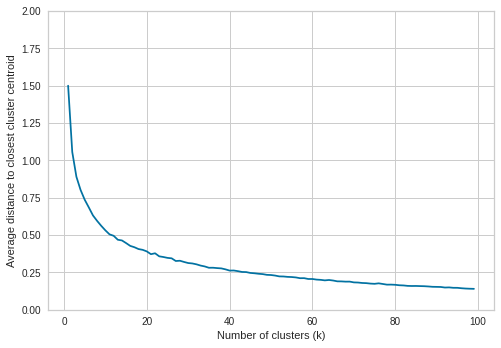

In [11]:
clusters = np.arange(len(distance_to_clostest_cluster_centre))+1
plt.plot(clusters, distance_to_clostest_cluster_centre)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average distance to closest cluster centroid')
plt.ylim(0,2)
plt.show()
